In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
from astropy.table import Table
t = Table.read('../NGC2264_2.vot', format='votable')

print("Finished reading Table. Read ",len(t['__Gmag_'])," sources")

Finished reading Table. Read  34126  sources


In [3]:
print("The astropy reader loads the data into the following variable names:")
print(t.colnames)

The astropy reader loads the data into the following variable names:
['RA_ICRS', 'e_RA_ICRS', 'DE_ICRS', 'e_DE_ICRS', 'Source', 'Plx', 'pmRA', 'pmDE', 'RADEcor', 'Dup', '__FG_', 'e__FG_', '__Gmag_', 'Var']


In [4]:
RA = t['RA_ICRS']
DE = t['DE_ICRS']
plx = t['Plx']
num = len(RA)


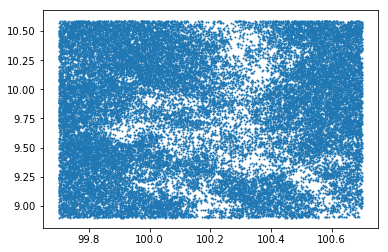

In [5]:
plt.scatter(RA,DE, s = 1)
plt.show()

In [6]:
X1 = np.zeros(num)
Y1 = np.zeros(num)
for i in range(0,num):
    X1[i] = RA[i]
    Y1[i] = DE[i]
X = np.column_stack((X1,Y1))
print(len(X))

34126


In [7]:
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=5).fit(X)
distances,indices = nbrs.kneighbors(X)
print(distances)
print(indices)

[[ 0.          0.00985273  0.01164646  0.01209377  0.01327101]
 [ 0.          0.00610001  0.00758417  0.00985273  0.01252959]
 [ 0.          0.00330648  0.0076093   0.00950663  0.0110868 ]
 ..., 
 [ 0.          0.00337527  0.00771939  0.01093018  0.0126553 ]
 [ 0.          0.00333663  0.00501439  0.00665787  0.00783859]
 [ 0.          0.01126194  0.01524391  0.01533741  0.01536448]]
[[    0     1    21    20    22]
 [    1   158   157     0    22]
 [    2     5    60    64    65]
 ..., 
 [34123 34122 33777 34124 33776]
 [34124 33781 33779 33780 33778]
 [34125 34118 29728 34119 29206]]


(array([  1.24900000e+04,   1.53870000e+04,   4.80300000e+03,
          1.03600000e+03,   2.87000000e+02,   8.90000000e+01,
          2.90000000e+01,   3.00000000e+00,   0.00000000e+00,
          2.00000000e+00]),
 array([  5.38010200e-05,   2.48673243e-03,   4.91966384e-03,
          7.35259526e-03,   9.78552667e-03,   1.22184581e-02,
          1.46513895e-02,   1.70843209e-02,   1.95172523e-02,
          2.19501837e-02,   2.43831151e-02]),
 <a list of 10 Patch objects>)

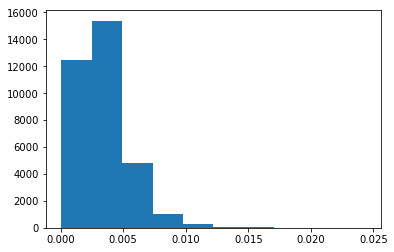

In [8]:
plt.hist(distances[:,1])

In [9]:
cat1 = np.array([])
cat2 = np.array([])
for i in range(len(X)):
    if distances[i,1] <= 0.004:
        if cat1.size == 0:
            cat1 = np.array([RA[i],DE[i]])
        else:
            cat1 = np.vstack((cat1,[RA[i],DE[i]]))
    if distances[i,1] > 0.004:
        if cat2.size == 0:
            cat2 = np.array([RA[i],DE[i]])
        else:
            cat2 = np.vstack((cat2,[RA[i],DE[i]]))


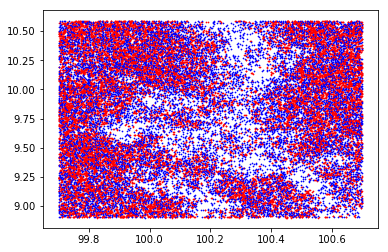

In [10]:
plt.scatter(cat1[:,0],cat1[:,1], s = 0.5, c = 'r')
plt.scatter(cat2[:,0],cat2[:,1], s = 0.5, c = 'b')
plt.show()

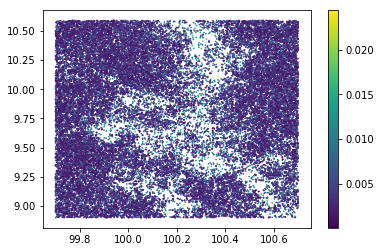

In [11]:
plt.scatter(RA,DE,s = 0.5, c = distances[:,1])
plt.colorbar()
plt.show()

In [ ]:
#create mapping function
def distance_map(data_coordinates,pixel_count)
    from scipy.spatial import KDTree

    #use KD tree to find distances to nearest neighbor stars
    tree = KDTree(array)

    #create array of coordinates for image background
    for i in range(0,pixel_count):
    for j in range(0,pixel_count):
        if (i==0 and j == 0):
            array4 = np.array([i,j])
        else:
            array3 = [i*.01,j*.01]
            array4 = np.vstack((array4,array3))

    #find nearest neighbor distances to background points
    image = tree.query(array4,k=3)

    #change array of background points so it is 100 x 100
    dist2 = image[0][:,2]
    dist2 = np.resize(dist2,(100,100))
    dist2 = np.rot90(dist2, k=1, axes=(1,0))
    dist2 = np.fliplr(dist2)

    #display map 
    plt.imshow(dist2, origin='lower')
    plt.scatter(array[:,0]*100,array[:,1]*100,s = 2,c = 'w')
    plt.show()
    return 

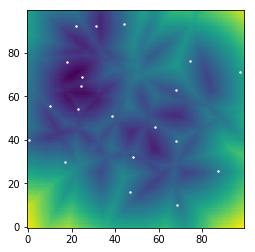

Elapsed time is: 1.9316458757966757


In [27]:
import timeit
start_time = timeit.default_timer()
from scipy.spatial import KDTree

#create 20 X 2 array of random star coordinates
array = np.random.rand(1,2)
for i in range(0,19):
    array = np.vstack((array,np.random.rand(1,2)))

#use KD tree to find distances to nearest neighbor stars
tree = KDTree(array)
dist, indices = tree.query(array,k=2)

#create 10,0000 X 2 array of coordinates for image background
for i in range(0,100):
    for j in range(0,100):
        if (i==0 and j == 0):
            array4 = np.array([i,j])
        else:
            array3 = [i*.01,j*.01]
            array4 = np.vstack((array4,array3))

#find nearest neighbor distances to background points
image = tree.query(array4,k=3)

#change array of background points so it is 100 x 100
dist2 = image[0][:,2]
dist2 = np.resize(dist2,(100,100))
dist2 = np.rot90(dist2, k=1, axes=(1,0))
dist2 = np.fliplr(dist2)

#display map 
plt.imshow(dist2, origin='lower')
plt.scatter(array[:,0]*100,array[:,1]*100,s = 2,c = 'w')
plt.show()
num = timeit.default_timer() - start_time
print('Elapsed time is: ' + str(num))

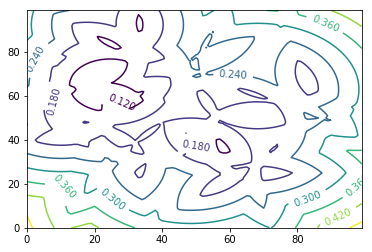

In [28]:
#contour plot
CS = plt.contour(dist2)
plt.clabel(CS, inline=1, fontsize=10)
plt.show()

In [45]:
#Minimum, maximum coordinates
RAmin = min(RA)
RAmax = max(RA)
DEmin = min(DE)
DEmax = max(DE)

print(RAmin)
print(RAmax)
print(DEmin)
print(DEmax)

print((RAmax-RAmin)/256)
print((DEmax-DEmin)/256)

99.7000075846
100.699998638
8.9000351092
10.5899924251
0.00390621505117
0.00660139576523


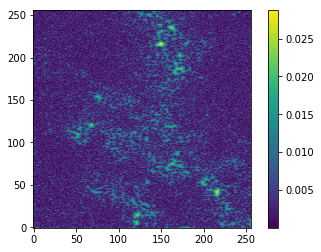

Elapsed time is: 21.929001811891794


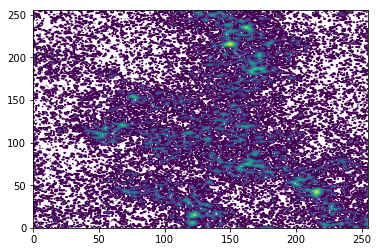

In [42]:
#Use KDtree on data 
start_time = timeit.default_timer()

#use KD tree to find distances to nearest neighbor stars
tree = KDTree(X)
dist, indices = tree.query(array)

#create array of coordinates for image background
Xmin = 99.7
Ymin = 8.9
dx = 0.003906
dy = 0.006601
for i in range(0,256):
    for j in range(0,256):
        if (i==0 and j == 0):
            array4 = np.array([Xmin,Ymin])
        else:
            array3 = [Xmin+dx*i,Ymin+dy*j]
            array4 = np.vstack((array4,array3))

#find nearest neighbor distances to background points
image = tree.query(array4,k=2)

#change array of background points so it is 100 x 100
dist2 = image[0][:,0]
dist2 = np.resize(dist2,(256,256))
dist2 = np.rot90(dist2, k=1, axes=(1,0))
dist2 = np.fliplr(dist2)

#display map 
plt.imshow(dist2, origin='lower')
plt.colorbar()
plt.show()
num = timeit.default_timer() - start_time
CS = plt.contour(dist2)
print('Elapsed time is: ' + str(num))



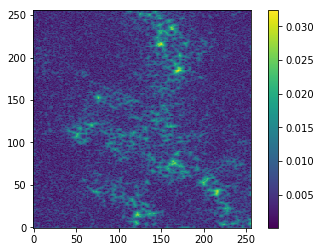

Elapsed time is: 31.79877670109272


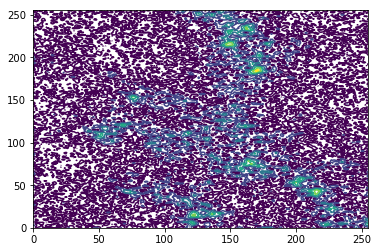

In [43]:
#Use KDtree on data 
start_time = timeit.default_timer()

#use KD tree to find distances to nearest neighbor stars
tree = KDTree(X)
dist, indices = tree.query(array)

#create array of coordinates for image background
Xmin = 99.7
Ymin = 8.9
dx = 0.003906
dy = 0.006601
for i in range(0,256):
    for j in range(0,256):
        if (i==0 and j == 0):
            array4 = np.array([Xmin,Ymin])
        else:
            array3 = [Xmin+dx*i,Ymin+dy*j]
            array4 = np.vstack((array4,array3))

#find nearest neighbor distances to background points
image = tree.query(array4,k=2)

#change array of background points so it is 100 x 100
dist2 = image[0][:,1]
dist2 = np.resize(dist2,(256,256))
dist2 = np.rot90(dist2, k=1, axes=(1,0))
dist2 = np.fliplr(dist2)

#display map 
plt.imshow(dist2, origin='lower')
plt.colorbar()
plt.show()
num = timeit.default_timer() - start_time
CS = plt.contour(dist2)
print('Elapsed time is: ' + str(num))

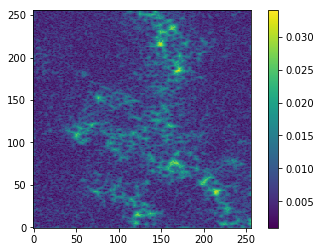

Elapsed time is: 23.510913498699665


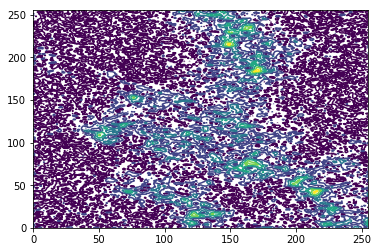

In [44]:
#Use KDtree on data 
start_time = timeit.default_timer()

#use KD tree to find distances to nearest neighbor stars
tree = KDTree(X)
dist, indices = tree.query(array)

#create array of coordinates for image background
Xmin = 99.7
Ymin = 8.9
dx = 0.003906
dy = 0.006601
for i in range(0,256):
    for j in range(0,256):
        if (i==0 and j == 0):
            array4 = np.array([Xmin,Ymin])
        else:
            array3 = [Xmin+dx*i,Ymin+dy*j]
            array4 = np.vstack((array4,array3))

#find nearest neighbor distances to background points
image = tree.query(array4,k=3)

#change array of background points so it is 100 x 100
dist2 = image[0][:,2]
dist2 = np.resize(dist2,(256,256))
dist2 = np.rot90(dist2, k=1, axes=(1,0))
dist2 = np.fliplr(dist2)

#display map 
plt.imshow(dist2, origin='lower')
plt.colorbar()
plt.show()
num = timeit.default_timer() - start_time
CS = plt.contour(dist2)
print('Elapsed time is: ' + str(num))